<a href="https://colab.research.google.com/github/raiajit9/test/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
fashion_mnist=keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

Scale down pixel of Images between 0 to 1 which is in between 0 to 255

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
train_images[0].shape

(28, 28)

In [6]:
import matplotlib.pyplot as plt


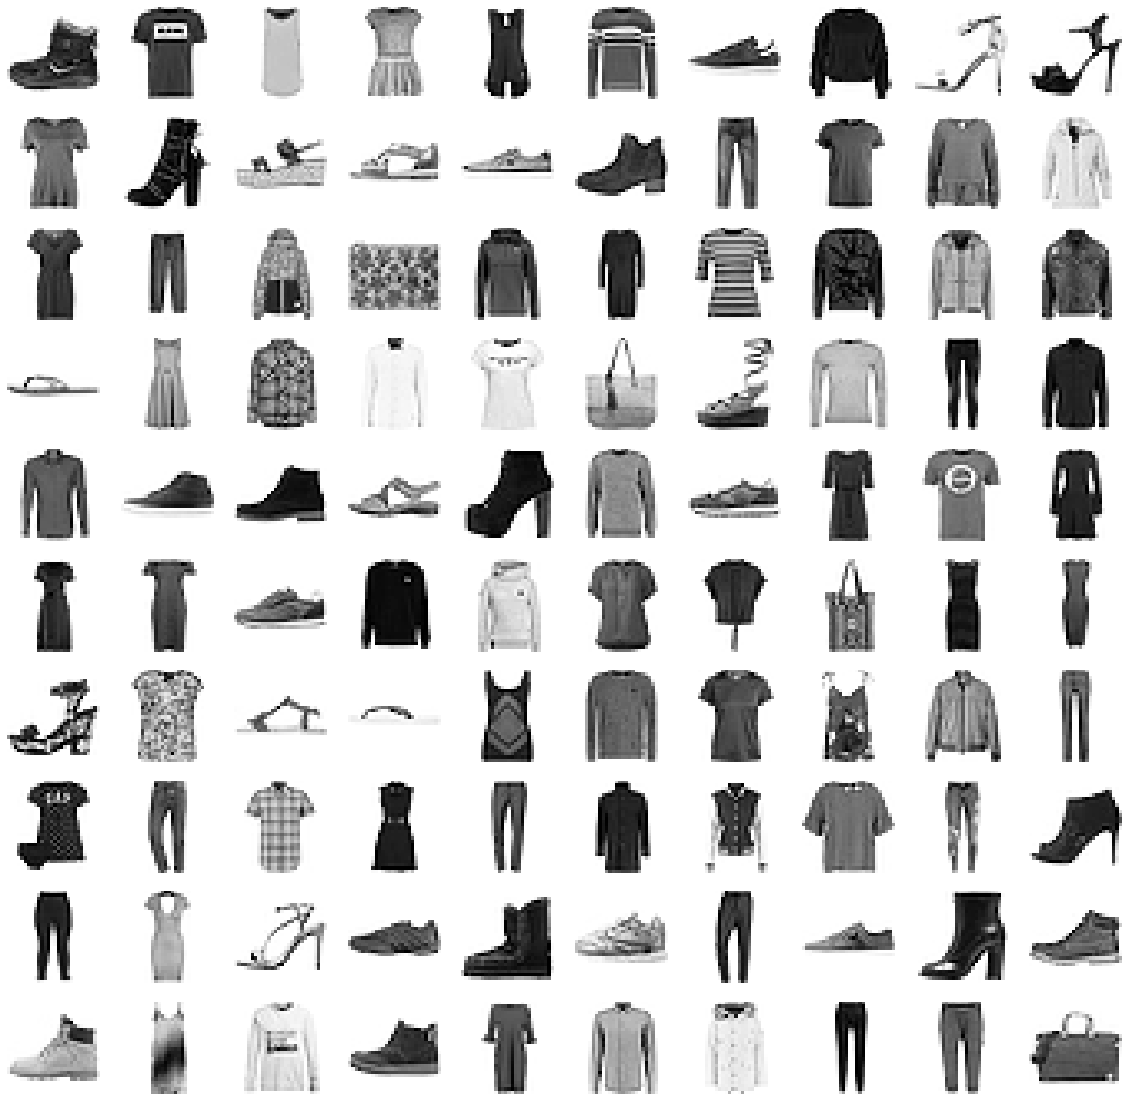

In [7]:
row,col=10,10
fig=plt.figure(figsize=(20,20))
for i in range(row*col):
  fig.add_subplot(row, col, i+1)
  plt.imshow(train_images[i], cmap='Greys')
  plt.axis('off')

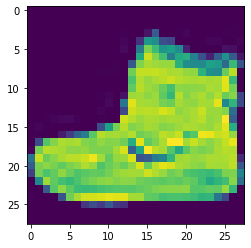

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])

Here Image is 28x28 pixel, we have to convert all train and test data in to 28x28 pixel

In [9]:
train_images=np.array(train_images)
test_images=np.array(test_images)
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [10]:
def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(filters=hp.Int('conv_1_filter',min_value=32, max_value=128, step=16),
                                                kernel_size=hp.Choice('conv_1_kernal', values=[3,5]),
                                                activation='relu',
                                                input_shape=(28,28,1)),
                            keras.layers.Conv2D(filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
                                                kernel_size=hp.Choice('conv_2_kernal', values=[3,5]),
                                                activation='relu'),
                            keras.layers.Flatten(),
                            keras.layers.Dense(units=hp.Int('dense_1_units', min_value=28, max_value=128, step=16),
                                               activation='relu'),
                            keras.layers.Dense(10, activation='softmax')])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return model
 

In [11]:
!pip install keras-tuner

In [12]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [13]:
tuner_search = RandomSearch(build_model, 
                            objective='val_accuracy', 
                            max_trials=5, 
                            directory='output', 
                            project_name="Mnist_fashion") 

INFO:tensorflow:Reloading Oracle from existing project output/Mnist_fashion/oracle.json
INFO:tensorflow:Reloading Tuner from output/Mnist_fashion/tuner0.json


In [14]:
tuner_search.search(train_images,train_labels, epochs=3, validation_split=0.1)

INFO:tensorflow:Oracle triggered exit


In [15]:
model=tuner_search.get_best_models(num_models=1)[0]

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 48)        48432     
_________________________________________________________________
flatten (Flatten)            (None, 27648)             0         
_________________________________________________________________
dense (Dense)                (None, 92)                2543708   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                930       
Total params: 2,594,190
Trainable params: 2,594,190
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(train_images,train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 11s 5ms/step - loss: 0.1216 - accuracy: 0.9542 - val_loss: 0.2633 - val_accuracy: 0.9157
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0817 - accuracy: 0.9702 - val_loss: 0.2718 - val_accuracy: 0.9157
Epoch 6/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0558 - accuracy: 0.9798 - val_loss: 0.3598 - val_accuracy: 0.9102
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0406 - accuracy: 0.9851 - val_loss: 0.4122 - val_accuracy: 0.9130
Epoch 8/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.4408 - val_accuracy: 0.9142
Epoch 9/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9916 - val_loss: 0.4487 - val_accuracy: 0.9112
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0209 - accuracy: 0.9926 - val_loss: 0.4695 - val_accurac

In [18]:
pred_images = model.predict(test_images)

In [19]:
prediction=np.argmax(pred_images, axis=1)

In [20]:
prediction

array([9, 2, 1, ..., 8, 1, 5])

In [26]:
test_labels[0]

9

In [27]:
prediction[0]

9

In [28]:
test_labels[100]

3

In [29]:
prediction[100]

3